<a href="https://colab.research.google.com/github/ibrahim-m-25/australianrainn/blob/main/tcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub --quiet
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
df = pd.read_csv(f"{path}/weatherAUS.csv")
df.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


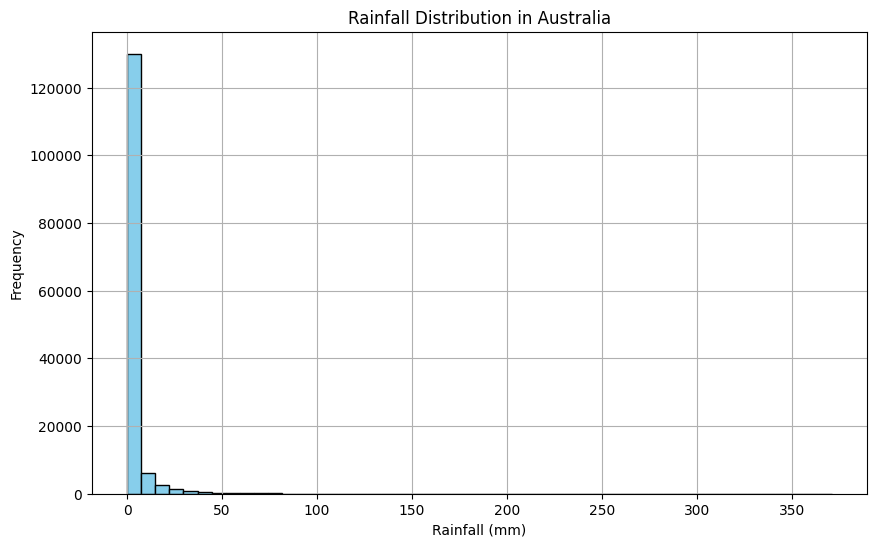

In [ ]:
import matplotlib.pyplot as plt
rain_data = df['Rainfall'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(rain_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Rainfall Distribution in Australia')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

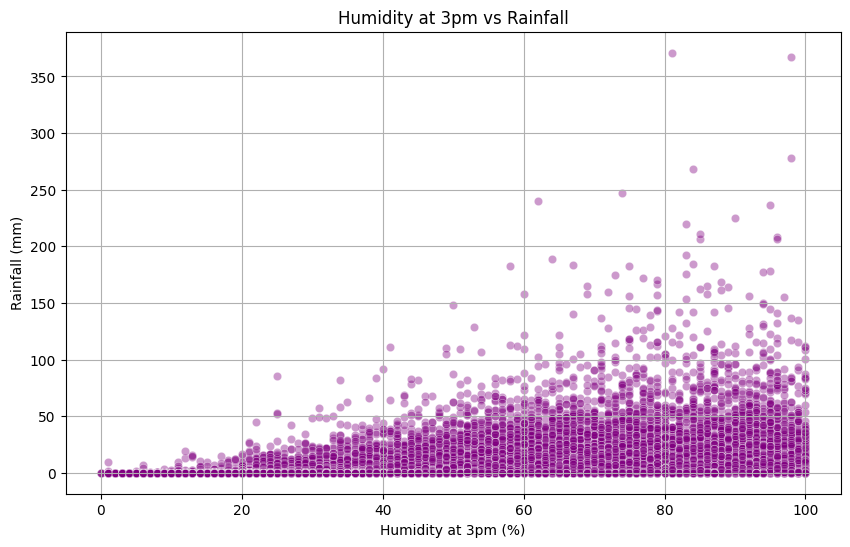

In [ ]:
import matplotlib.pyplot as plt
subset = df[['Humidity3pm', 'Rainfall']].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(subset['Humidity3pm'], subset['Rainfall'], alpha=0.4, color='purple', edgecolors='w', linewidths=0.5)
plt.title('Humidity at 3pm vs Rainfall')
plt.xlabel('Humidity at 3pm (%)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()



<Figure size 1200x600 with 0 Axes>

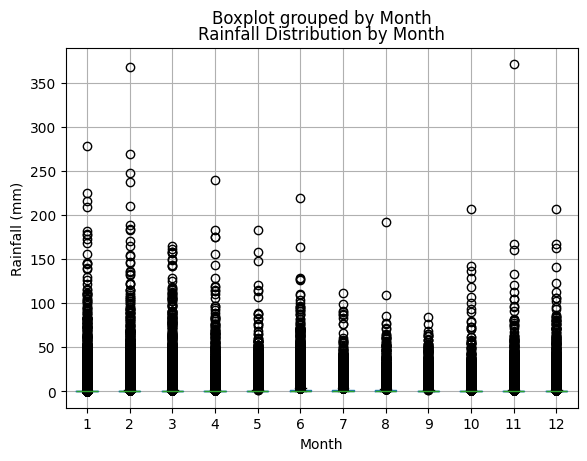

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
plt.figure(figsize=(12, 6))
df.boxplot(column='Rainfall', by='Month')
plt.title('Rainfall Distribution by Month')
plt.ylabel('Rainfall (mm)')
plt.show()

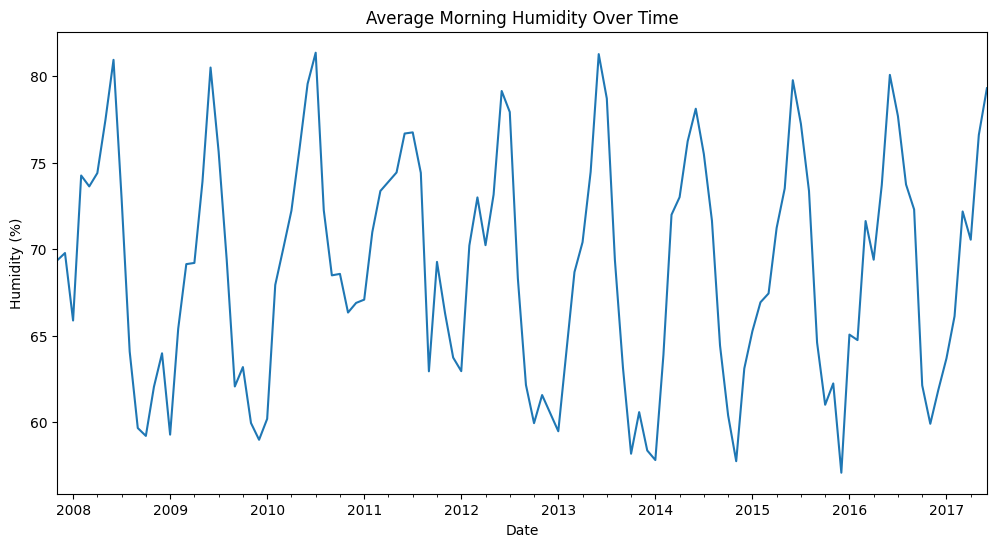

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_humidity = df.groupby(df['Date'].dt.to_period('M'))['Humidity9am'].mean()
plt.figure(figsize=(12, 6))
monthly_humidity.plot()
plt.title('Average Morning Humidity Over Time')
plt.ylabel('Humidity (%)')
plt.show()